# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (# Step 1)
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(url).json()
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: Extraction
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        #city_pressure = data.get("main", {}).get("pressure")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          #"Pressure": city_pressure
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san jose de jachal
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | kirakira
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | daru
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | kutum
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | skeldon
Processing Record 15 of Set 1 | el porvenir
Processing Record 16 of Set 1 | newman
Processing Record 17 of Set 1 | devinuwara
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | zaltan
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | lajinha
Processing Record 23 of Set 1 | i-n-salah
Proc

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          615
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san jose de jachal,-30.2406,-68.7469,53.56,41.0,5.0,5.95,AR,1.717568e+09
1,carnarvon,-24.8667,113.6333,77.79,40.0,0.0,10.20,AU,1.717568e+09
2,bilibino,68.0546,166.4372,57.43,46.0,69.0,6.06,RU,1.717568e+09
3,adamstown,-25.0660,-130.1015,71.46,79.0,100.0,9.62,PN,1.717568e+09
4,kirakira,-10.4544,161.9205,82.00,83.0,100.0,8.52,SB,1.717568e+09


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san jose de jachal,-30.2406,-68.7469,53.56,41.0,5.0,5.95,AR,1.717568e+09
1,carnarvon,-24.8667,113.6333,77.79,40.0,0.0,10.20,AU,1.717568e+09
2,bilibino,68.0546,166.4372,57.43,46.0,69.0,6.06,RU,1.717568e+09
3,adamstown,-25.0660,-130.1015,71.46,79.0,100.0,9.62,PN,1.717568e+09
4,kirakira,-10.4544,161.9205,82.00,83.0,100.0,8.52,SB,1.717568e+09


In [40]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 614
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        615 non-null    object 
 1   Lat         581 non-null    float64
 2   Lng         581 non-null    float64
 3   Max Temp    581 non-null    float64
 4   Humidity    581 non-null    float64
 5   Cloudiness  581 non-null    float64
 6   Wind Speed  581 non-null    float64
 7   Country     579 non-null    object 
 8   Date        581 non-null    float64
dtypes: float64(7), object(2)
memory usage: 48.0+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

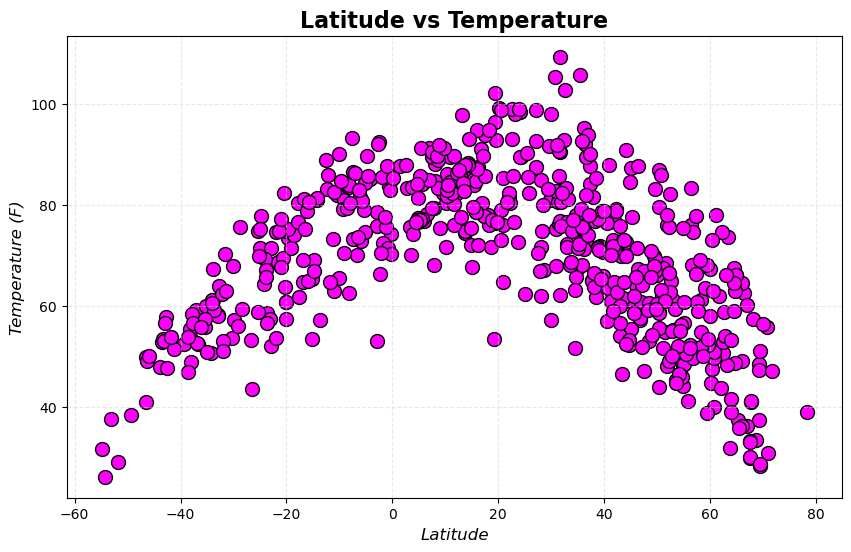

In [41]:
# Build scatter plot for latitude vs. temperature
# scatter latitude vs temperature

# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="fuchsia", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig1.png")

# Step 5: Show/Save the graph
plt.show()


#### Latitude Vs. Humidity

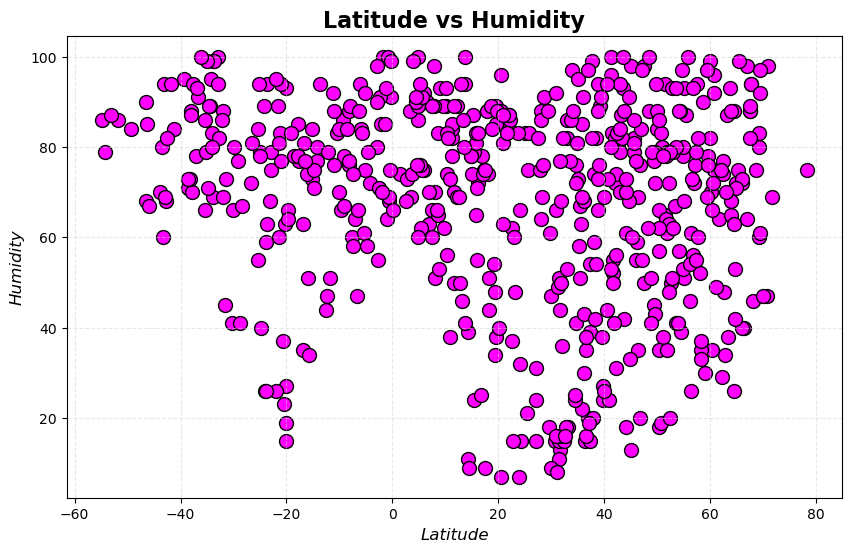

In [42]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="fuchsia", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig2.png")

# Step 5: Show/Save the graph
plt.show()

#### Latitude Vs. Cloudiness

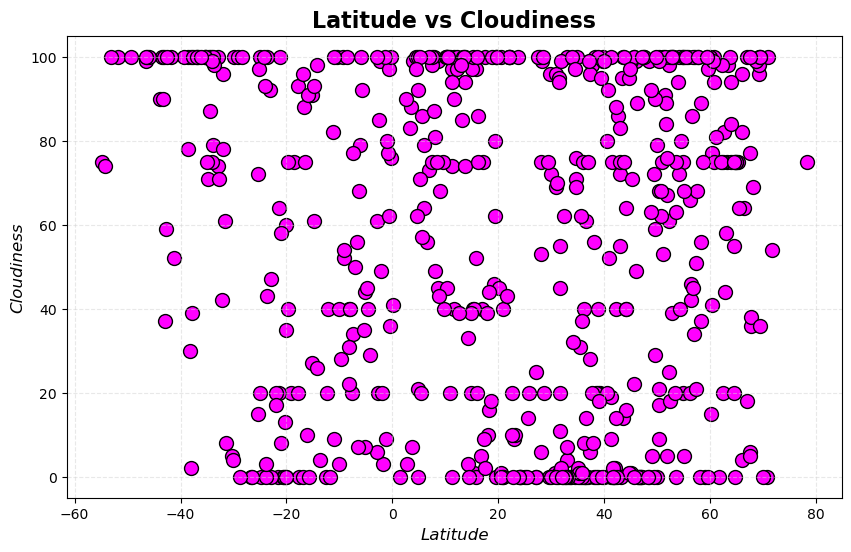

In [43]:
# Build the scatter plots for latitude vs. cloudiness
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df.Cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="fuchsia", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig3.png")

# Step 5: Show/Save the graph
plt.show()

#### Latitude vs. Wind Speed Plot

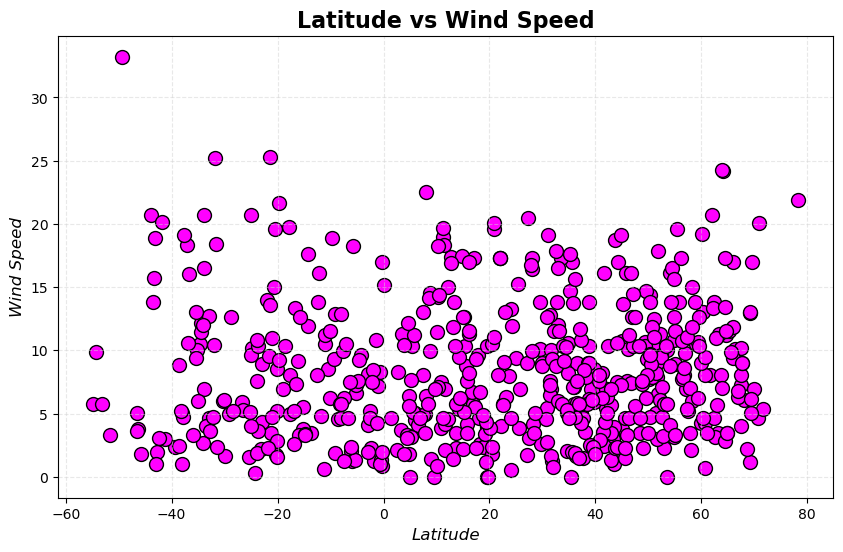

In [44]:
# Build the scatter plots for latitude vs. wind speed
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df['Wind Speed']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="fuchsia", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig4.png")

# Step 5: Show/Save the graph
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots

def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS
  
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="fuchsia", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,57.43,46.0,69.0,6.06,RU,1.717568e+09
5,bethel,41.3712,-73.4140,62.69,83.0,75.0,3.44,US,1.717568e+09
7,albany,42.6001,-73.9662,70.21,80.0,86.0,2.53,US,1.717568e+09
8,sitka,57.0531,-135.3300,51.69,76.0,100.0,6.91,US,1.717568e+09
10,kutum,14.2000,24.6667,88.39,11.0,33.0,5.39,SD,1.717568e+09


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san jose de jachal,-30.2406,-68.7469,53.56,41.0,5.0,5.95,AR,1.717568e+09
1,carnarvon,-24.8667,113.6333,77.79,40.0,0.0,10.20,AU,1.717568e+09
3,adamstown,-25.0660,-130.1015,71.46,79.0,100.0,9.62,PN,1.717568e+09
4,kirakira,-10.4544,161.9205,82.00,83.0,100.0,8.52,SB,1.717568e+09
6,daru,-9.0763,143.2092,80.96,78.0,52.0,12.86,PG,1.717568e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5173595614774985


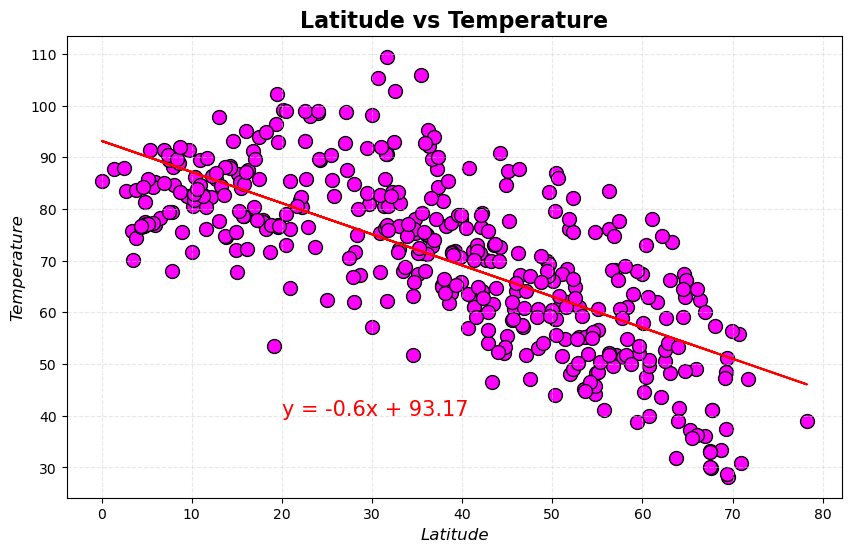

In [48]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (20,40))

The r-squared is: 0.6617055576390359


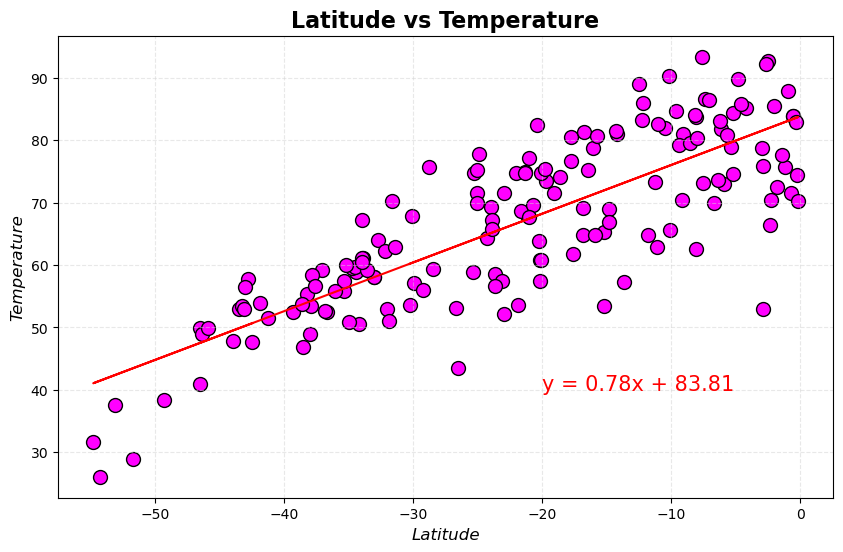

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (-20,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [50]:
# There is a "good" linear relationship between latitude and temperature for the northern and southern hemispheres 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00024189454068862675


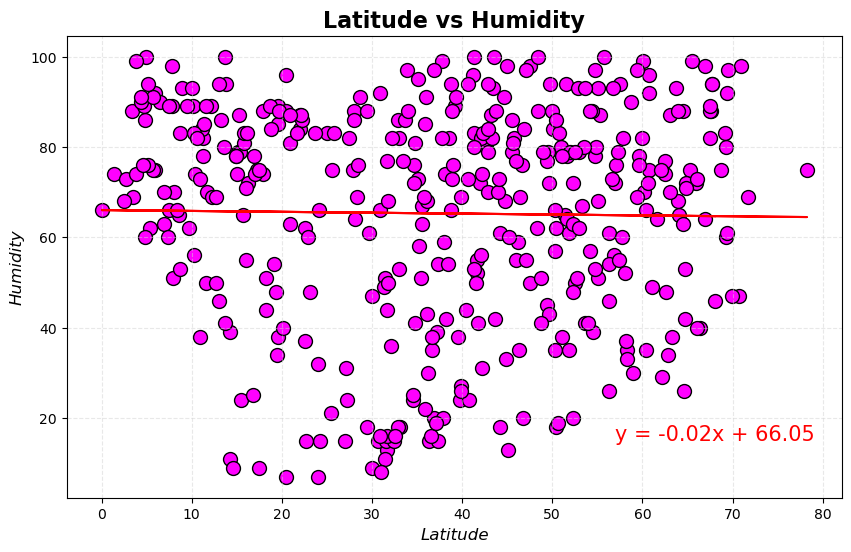

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]

doRegression(x_values, y_values, "Latitude", "Humidity", (57,15))

The r-squared is: 0.007408336549002044


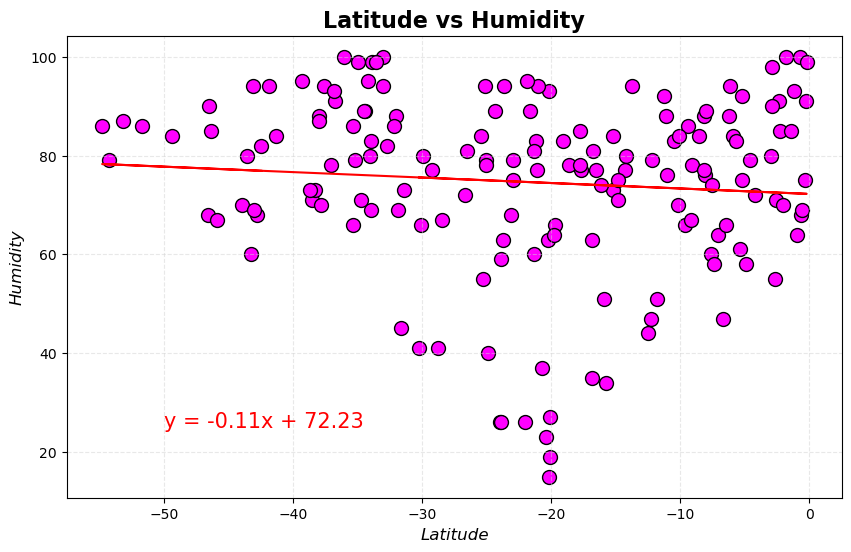

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]

doRegression(x_values, y_values, "Latitude", "Humidity", (-50,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [53]:
# There is a "poor" linear relationship between latitude and humidity for the northern and southern hemispheres 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0012915169316927142


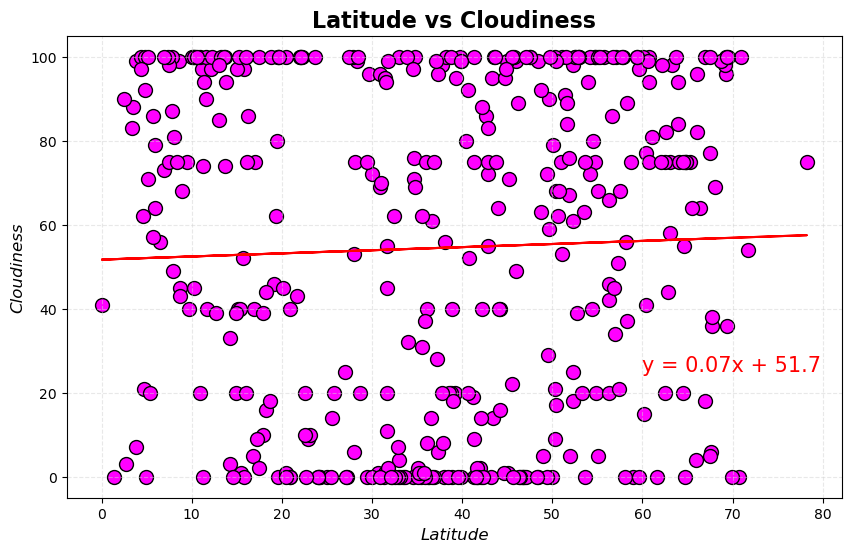

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]

doRegression(x_values, y_values, "Latitude", "Cloudiness", (60,25))

The r-squared is: 0.10227987239692857


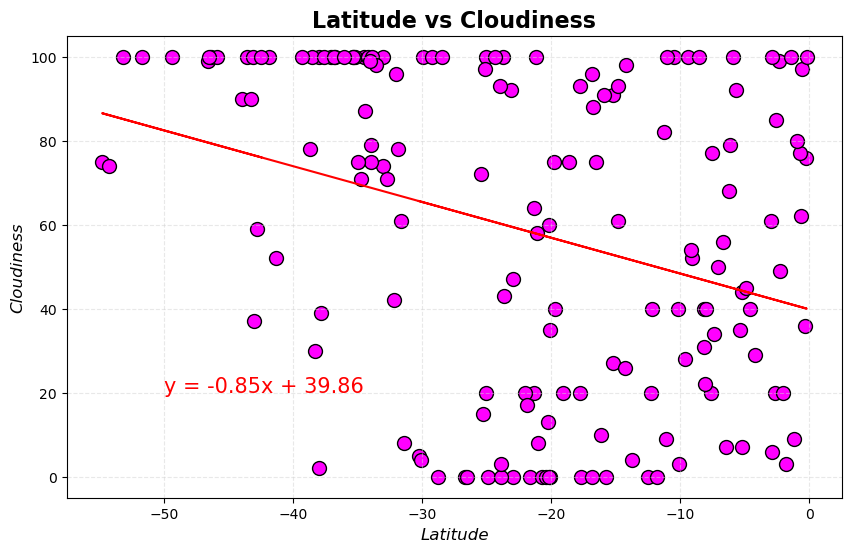

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]

doRegression(x_values, y_values, "Latitude", "Cloudiness", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [56]:
# There is a "poor" linear relationship between latitude and cloudiness for the northern and southern hemispheres 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007936364534618968


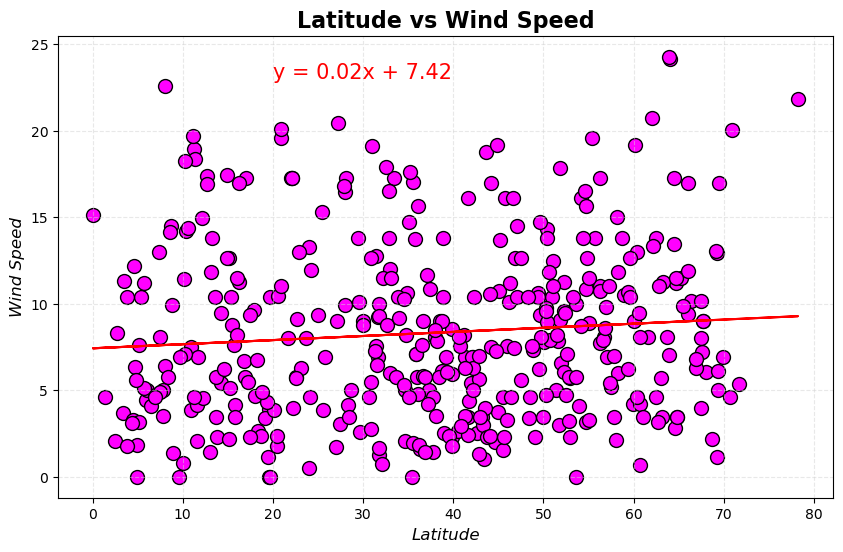

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]

doRegression(x_values, y_values, "Latitude", "Wind Speed", (20,23))

The r-squared is: 0.02437819167062063


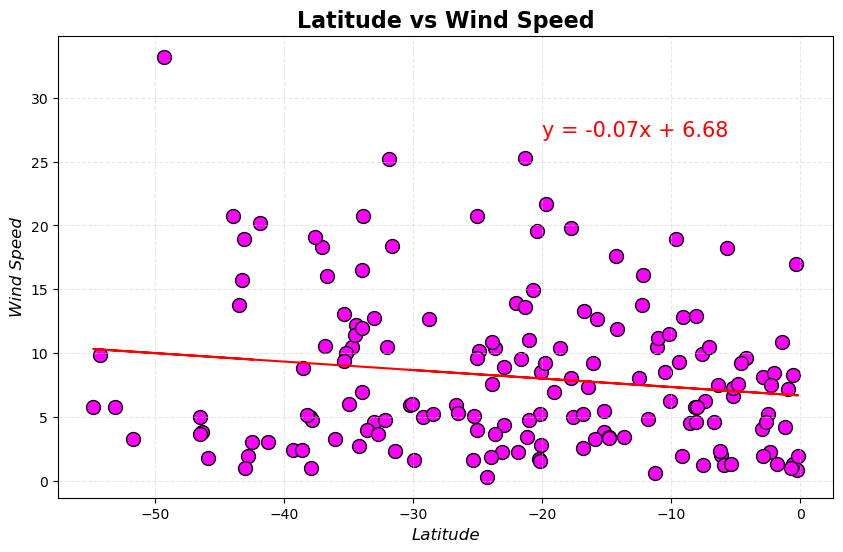

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]

doRegression(x_values, y_values, "Latitude", "Wind Speed", (-20,27))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [59]:
# There is a "poor" linear relationship between latitude and wind speed for the northern and southern hemispheres 